<a href="https://colab.research.google.com/github/WoonTheGreat/Data-Analytics-Project/blob/main/moviedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction:
The data set I chose is Movie dataset

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

----

Questions for this dataset:

Q1: Does higher budget mean higher popularity ? Is there a coefficent relationship ?

Q2: Will the runtime affect the vote count and popularity?

Q3: Higher popularity means higher profits ?

Q4: What Features are Associate with Top 10 Revenue Movies ?

Q5: Which genres are most popular from year to year?

In [1]:
# Import all the libraries which will be used later
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline 

Data Wrangling:

Getting familiar with the data types, data structure. 

Delete the duplicates and unuseful columns like imdb_id,homepage etc.

Filling the null with string "missing". For budget, datatype integer, filling 0 with np.NAN.

In [3]:
# load in data and print out the head 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# check the rows and columns of this dataset
df.shape 

(10866, 21)

In [5]:
# check datatypes to see if there are some wrongly categorized types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# identify unique values from each columns 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# statistic values for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# dropping unuseful columns 
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)  # do not forget inplace 

# Ways to handle missing data
# For all missing data with object as datatype , I fill in with string "missing"
df['cast'].fillna('missing',inplace=True )
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True) 
df['budget'] = df['budget'].replace(0, np.NAN) 
# although there is no null in budget, but we would find there is a problem when we calculate df['budget'].median()
# Will deal with all the 0 value in budget later.

In [12]:
# confirm the data after cleaning missing data
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
# check if there are some duplicates 
df.duplicated().sum()

1

In [14]:
# drop the duplicates
# do not forget inplace = True 
df.drop_duplicates(inplace=True)    
# confirm again 
df.duplicated().sum()   

0

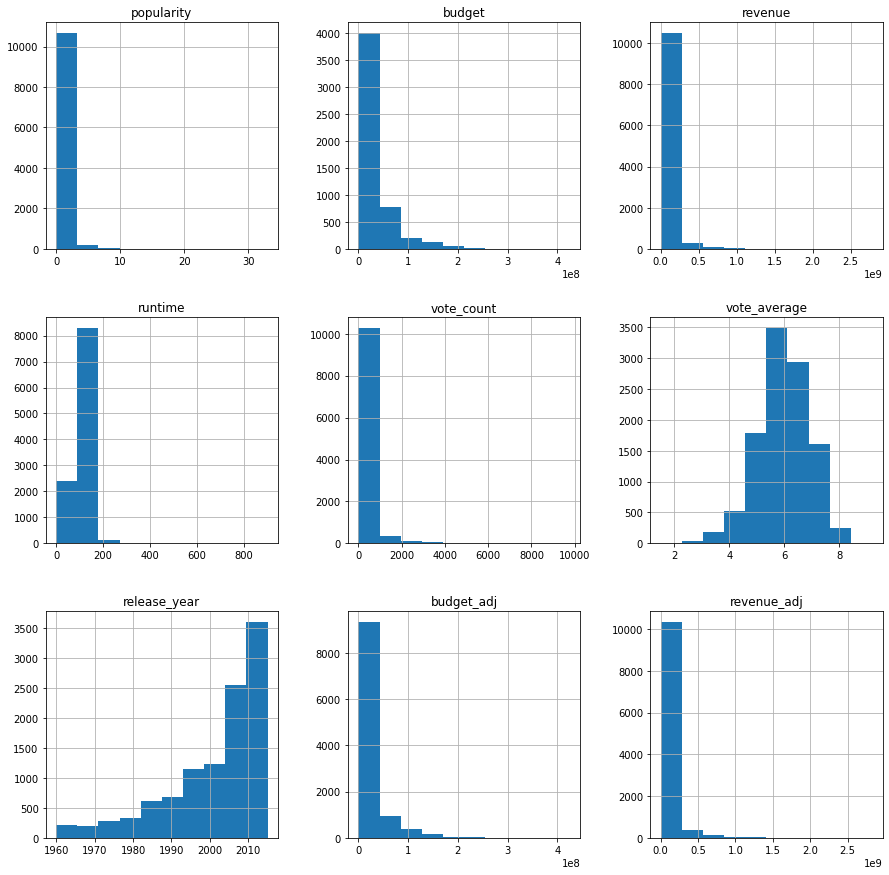

In [15]:
# visulize each variables 
df.hist(figsize=(15,15));

Exploration with Visuals and Conclusions

---
Question 1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

Text(0, 0.5, 'popularity')

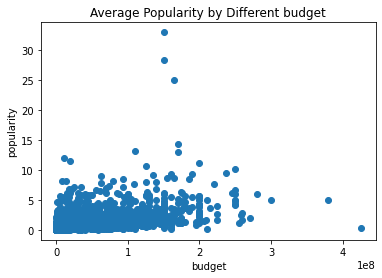

In [17]:
# plot the relation between budget and popularity 
x = df['budget']
y = df['popularity'] 

plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('budget',fontsize=10)
plt.ylabel('popularity',fontsize=10)

Through this scatterplot, it is unable to identify strong relatioship between the budget and the popularity. 

We will then try to compare the data in another way: create two groups based on median value of budget

In [18]:
# based on median budget value to divide the budget into two groups : low and high
m = df['budget'].median()
low_budg =  df.query('budget < {}'.format(m))
high_budg =  df.query('budget >= {}'.format(m))

In [19]:
# check low budget and high budget mean values respecively 
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

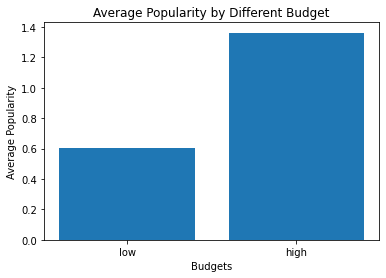

In [20]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [21]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947093

Conclusion for Q1: 

Through this bar plot, we can clearly see that high budget movies are more likely to have higher popularity. 

Higher budget movies also gains more than 50% higher popularity than low budget movies.

---
Q2: What length will receive the highest popularity?



In [22]:
# 3 groups will be created with query().  <60 min: short   , 60 min to 120 min: medium ,  >120 min: long 
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
long = df.query('runtime > {}'.format(200))

In [23]:
# check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

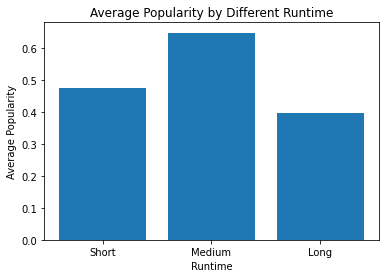

In [25]:
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['Short','Medium','Long']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')


Based on the bar chart, the movies should not be too long or too short. Medium length has a higher popularity. However it is difficult to tell the best length of runtime. Scatter plot may be a better choice.

Text(0, 0.5, 'popularity')

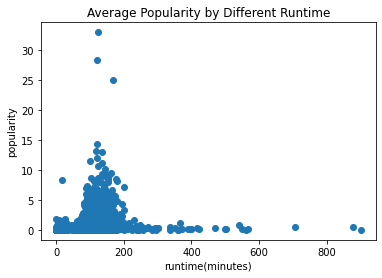

In [30]:
# plot the relation between runtime and popularity 
x = df['runtime']
y = df['popularity'] 

plt.scatter(x,y)

plt.title('Average Popularity by Different Runtime',fontsize=12)
plt.xlabel('runtime(minutes)',fontsize=10)
plt.ylabel('popularity',fontsize=10)

Conclusion Q2:

Based on the 2 plots above, it is false to say the longer the runtime, the higher the popularity.

However, movies within 200 minutes has higher popularity. Movies over 200 minutes have lower popularity.

-----
Q3 : Higher popularity means higher profits ?

In [35]:
# we need to get the mean of popularity 
m_popularity = df['popularity'].mean()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

In [36]:
# create a new column called profit. profit = Revenue - budget
df['profit'] = df['revenue'] - df['budget']
#df['profit'].head(20)
#df.head()

In [37]:
# average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()
# df.head()

Text(0, 0.5, 'Average Profit')

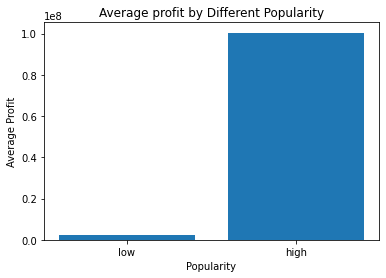

In [38]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

Conclusion for Question 3: 

Higher popularity = Higher average profit

----

Q4: What Features are Associate with Top 10 Revenue Movies ?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12a9740250>,
      dtype=object)

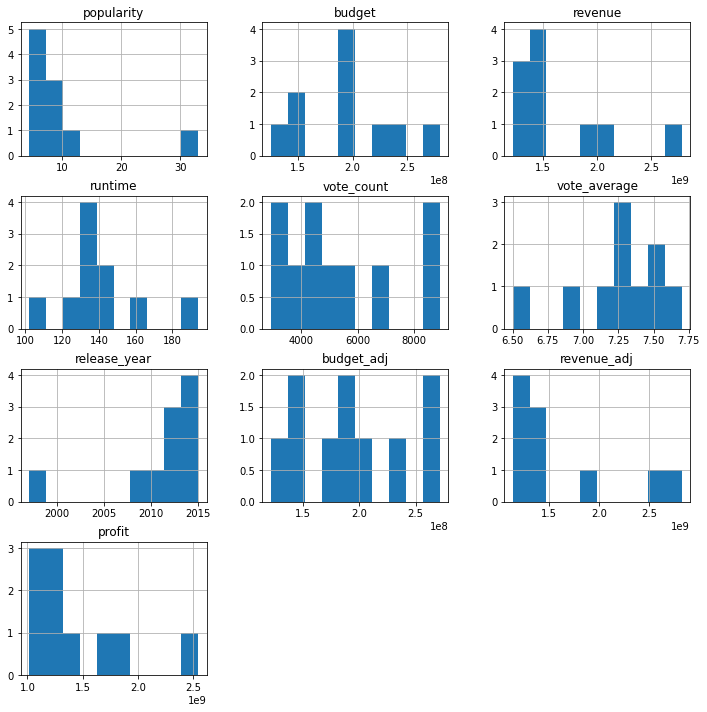

In [39]:
top10_revenue = df.nlargest(10,'revenue')
top10_revenue.hist(figsize=(12,12))


Conclusion for Q4:

Based on the histogram above, we have listed some characteristics we can conclude from the top 10 movies. 

Runtime ranges from 100 mins to 200 mins. The released year are between 1995 to 2015.

----

Q5: Which genres are most popular from year to year?


In [40]:
#The following function can give all the counts for per category 
def extract_data(column_name):
    data = df[column_name].str.cat(sep = '|') # put all the genres into a long string  
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))   # split the genres by |
    # Display value count in descending order
    count = data.value_counts(ascending = False) # count the occurrence of each genres 
    return count

In [44]:
# use the function created above to split genres and count the occurrence of each one
genre_count = extract_data('genres')

#create a separate dataframe to plot
df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 
df_genre_counts
#to show number of movies for each genre

,genres,count
0,Drama,4760
1,Comedy,3793
2,Thriller,2907
3,Action,2384
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1354
8,Family,1231
9,Science Fiction,1229


Create barplot for easy visualization

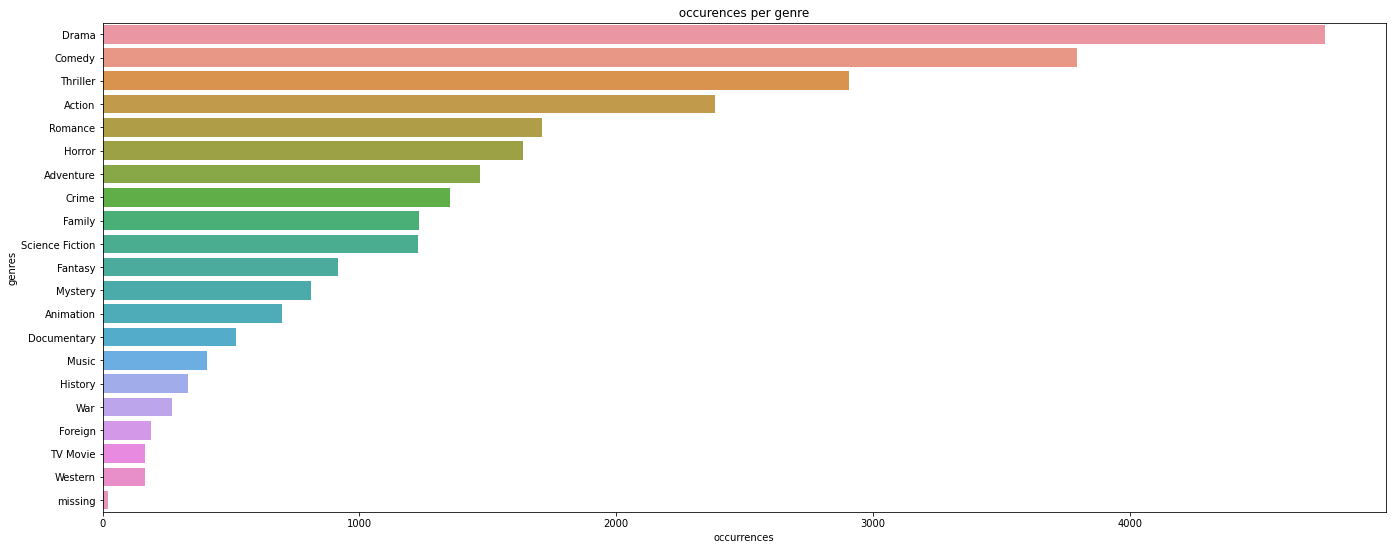

In [43]:
f, ax = plt.subplots(figsize=(23, 9))
# use the dataframe just created as the input data 
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts) # how to get the data is the key #using sns
ax.set_title(' occurences per genre ')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

In [45]:
director_count = extract_data('director')
director_count

Woody Allen         46
missing             44
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
                    ..
Mike Maguire         1
Tom Kuntz            1
John Simpson         1
Simon Hunter         1
Harold P. Warren     1
Length: 5363, dtype: int64

Text(0, 0.5, 'number of movies')

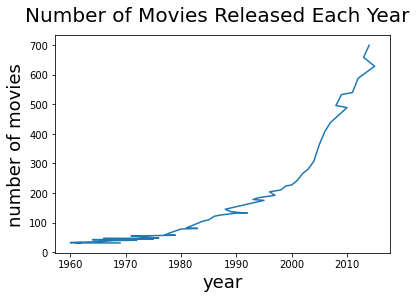

In [48]:
movie_count = df['release_year'].value_counts()
# movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released Each Year')
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year',fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies',fontsize=18)

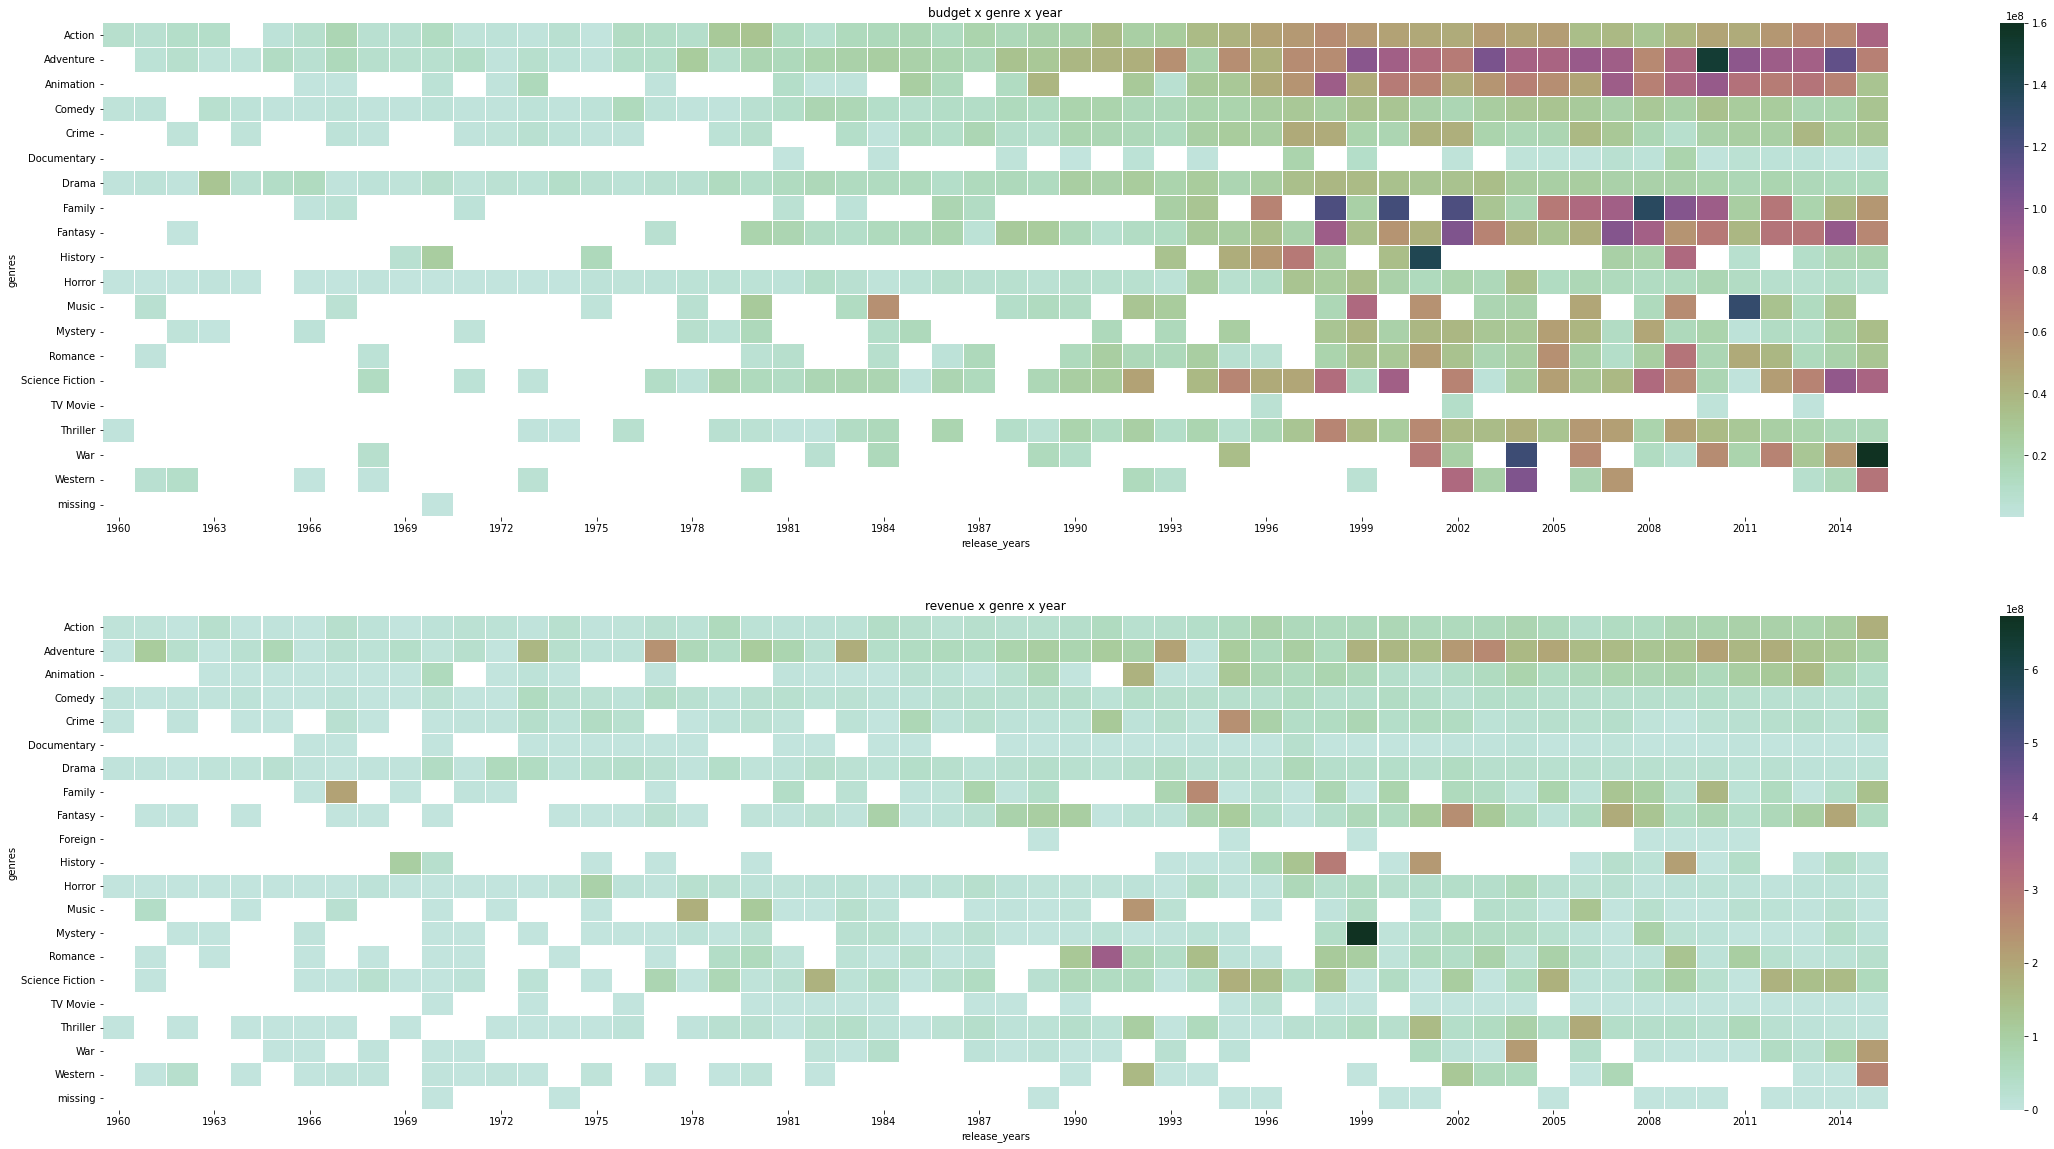

In [49]:
# The following is a really comprehensive plot. It shows the revenue and budget for each genre type per year
# genres are so specific, I will just take the first genre for each movie instead of the genre combination
df['genre'] =  df['genres'].apply(lambda x: x.split('|')[0])

# plot all the genre types for each year with the budget and revenue
genre_year = df.groupby(['genre', 'release_year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)


df_gyGross = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='revenue', aggfunc=np.mean)
f, [axA, axB] = plt.subplots(figsize=(40, 20), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axB)
axA.set_title('budget x genre x year')
axA.set_xlabel('release_years')
axA.set_ylabel('genres')


axB.set_title('revenue x genre x year')
axB.set_xlabel('release_years')
axB.set_ylabel('genres')
plt.show()

Conclusion for Q5: 

As the time goes, we have a wider range of movies and genres to choose from. From 1984 to 2014, there are more high budget, high revenue movies.

Conclusion:
---
Based on the analysis above, we can make the following summarizations:

1. The quantity and range of movie gets larger.We have more choices to choose from as an audience.

2. Although high budget doesn't guarantees high popularity. But movies with higher budgets do produce higher average popularity.

3. To produce a more popular movie, the runtime should be best around 150 mins; Genres such as Drama, Comedy, Action would be more preferable.


Limitations:
--
1. Missing data and many erroreous zeros which may affect the analysis.

2. It's hard for us to know how the vote_counts and popularity are measured.

3. For foreign movies,currecy is not indicated. inflation over the years should also be taken into consideration.

Reference:
--
1. https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
2. https://www.kaggle.com/diegoinacio/imdb-genre-based-analysis 
3. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html 
4. https://pandas.pydata.org/pandas-docs/stable/visualization.html
5. https://github.com/CICIFLY/Data-Analytics-Projects/tree/master/Data%20Analytics%20with%20Movie%20Data